<a href="https://colab.research.google.com/github/renad01/smartmethods_iot_task2/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


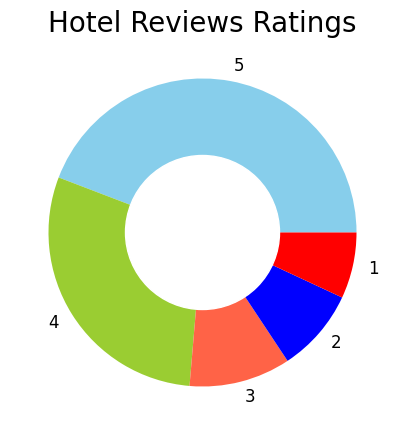

In [ ]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

                                              Review  Rating  Positive  \
0  nice hotel expensive parking got good deal sta...       4     0.285   
1  ok nothing special charge diamond member hilto...       2     0.189   
2  nice rooms not 4* experience hotel monaco seat...       3     0.219   
3  unique, great stay, wonderful time hotel monac...       5     0.385   
4  great stay great stay, went seahawk game aweso...       5     0.221   

   Negative  Neutral  
0     0.072    0.643  
1     0.110    0.701  
2     0.081    0.700  
3     0.060    0.555  
4     0.135    0.643  


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  6359.91000000002
Negative:  1473.4750000000038
Neutral:  12657.627999999937


In [ ]:
df_dc = pd.get_dummies(data, columns=['Review'])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        

In [ ]:

from sklearn.model_selection import train_test_split

X = df_dc
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 97.76%
_______________________________________________
CLASSIFICATION REPORT:
                1            2            3            4       5  accuracy  \
precision     1.0     1.000000     1.000000     0.928613     1.0   0.97755   
recall        1.0     0.998630     0.791096     1.000000     1.0   0.97755   
f1-score      1.0     0.999315     0.883365     0.962985     1.0   0.97755   
support    1129.0  1460.000000  1752.000000  4787.000000  7264.0   0.97755   

              macro avg  weighted avg  
precision      0.985723      0.979153  
recall         0.957945      0.977550  
f1-score       0.969133      0.976663  
support    16392.000000  16392.000000  
_______________________________________________
Confusion Matrix: 
 [[1129    0    0    0    0]
 [   0 1458    0    2    0]
 [   0    0 1386  366    0]
 [   0    0    0 4787    0]
 [   0    0    0    0 7264]]

